In [1]:
#Importing the basic libraries required for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('LendingClub2012to2013.csv')
data.head()

C:\Users\gvsva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10129506,11981122.0,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,...,0.0,3.0,90.2,50.0,0.0,0.0,43100.0,23473.0,15000.0,0.0
1,10159498,1319523.0,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,...,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0
2,10129454,11981072.0,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0
3,10139658,11991209.0,12000.0,12000.0,12000.0,36 months,13.53%,407.40,B,B5,...,0.0,2.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0
4,10127816,11979581.0,24000.0,24000.0,24000.0,36 months,13.53%,814.80,B,B5,...,0.0,2.0,100.0,75.0,0.0,0.0,229072.0,61397.0,21500.0,58847.0


In [3]:
#to get know of the data
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.881810e+05,188181.000000,188181.00000,188181.000000,188181.000000,1.881810e+05,188181.000000,188181.000000,188181.000000,188181.000000,...,160440.000000,160440.000000,160287.000000,179153.000000,188181.000000,188181.000000,1.604400e+05,1.806860e+05,180686.000000,1.604400e+05
mean,5.911942e+06,14354.139366,14351.61985,14339.617827,443.736364,7.223328e+04,17.060171,0.239626,696.810119,700.810225,...,0.063737,1.788014,95.399571,53.558127,0.084785,0.014040,1.655453e+05,4.288377e+04,20238.462072,3.438956e+04
std,3.343860e+06,8114.766207,8112.60861,8107.009785,242.646904,5.182459e+04,7.597634,0.703730,29.958302,29.958829,...,0.367567,1.516775,7.391559,34.148169,0.290168,0.241542,1.672533e+05,4.017789e+04,18883.558196,3.687963e+04
min,1.495120e+05,1000.000000,1000.00000,950.000000,21.620000,4.800000e+03,0.000000,0.000000,660.000000,664.000000,...,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.216730e+06,8000.000000,8000.00000,8000.000000,269.980000,4.500000e+04,11.340000,0.000000,675.000000,679.000000,...,0.000000,1.000000,93.000000,25.000000,0.000000,0.000000,4.479500e+04,1.890425e+04,7800.000000,1.004950e+04
50%,6.047773e+06,12175.000000,12125.00000,12100.000000,398.210000,6.200000e+04,16.780000,0.000000,690.000000,694.000000,...,0.000000,2.000000,100.000000,50.000000,0.000000,0.000000,1.085000e+05,3.296300e+04,14700.000000,2.575150e+04
75%,8.721725e+06,20000.000000,20000.00000,19975.000000,578.310000,8.700000e+04,22.580000,0.000000,710.000000,714.000000,...,0.000000,3.000000,100.000000,80.000000,0.000000,0.000000,2.437328e+05,5.385975e+04,26500.000000,4.693525e+04
max,1.209697e+07,35000.000000,35000.00000,35000.000000,1408.130000,7.141778e+06,34.990000,29.000000,845.000000,850.000000,...,24.000000,25.000000,100.000000,100.000000,8.000000,53.000000,9.999999e+06,2.644442e+06,522210.000000,1.214546e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 165.1+ MB


In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=115)

In [6]:
data.apply(lambda x: len(x.unique()))#checking the unique column values

id                                188183
member_id                         188182
loan_amnt                           1259
funded_amnt                         1260
funded_amnt_inv                     1694
term                                   3
int_rate                             146
installment                        29663
grade                                  8
sub_grade                             36
emp_title                         115187
emp_length                            12
home_ownership                         6
annual_inc                         15611
verification_status                    4
issue_d                               25
loan_status                            8
pymnt_plan                             2
url                               188182
desc                               80661
purpose                               14
title                              44946
zip_code                             840
addr_state                            50
dti             

In [7]:
data.apply(lambda x: sum(x.isnull())) # checking the null column values

id                                     0
member_id                              2
loan_amnt                              2
funded_amnt                            2
funded_amnt_inv                        2
term                                   2
int_rate                               2
installment                            2
grade                                  2
sub_grade                              2
emp_title                          11739
emp_length                          7889
home_ownership                         2
annual_inc                             2
verification_status                    2
issue_d                                2
loan_status                            2
pymnt_plan                             2
url                                    2
desc                              106705
purpose                                2
title                                  9
zip_code                               2
addr_state                             2
dti             

In [8]:
#to get the knowledge of the datatypes, numeric float values data and objects present in the data
columns = []
datatypes = []
objects =[]
floats=[]

for i in data.columns:
    columns.append(i)
    datatypes.append(data[i].dtype)
    if data[i].dtype==float:
        floats.append(i)
    else :
        objects.append(i)
    print(i, ":",data[i].dtype)

id : object
member_id : float64
loan_amnt : float64
funded_amnt : float64
funded_amnt_inv : float64
term : object
int_rate : object
installment : float64
grade : object
sub_grade : object
emp_title : object
emp_length : object
home_ownership : object
annual_inc : float64
verification_status : object
issue_d : object
loan_status : object
pymnt_plan : object
url : object
desc : object
purpose : object
title : object
zip_code : object
addr_state : object
dti : float64
delinq_2yrs : float64
earliest_cr_line : object
fico_range_low : float64
fico_range_high : float64
inq_last_6mths : float64
mths_since_last_delinq : float64
mths_since_last_record : float64
open_acc : float64
pub_rec : float64
revol_bal : float64
revol_util : object
total_acc : float64
initial_list_status : object
out_prncp : float64
out_prncp_inv : float64
total_pymnt : float64
total_pymnt_inv : float64
total_rec_prncp : float64
total_rec_int : float64
total_rec_late_fee : float64
recoveries : float64
collection_recovery_fe

In [9]:
df = pd.DataFrame({"cols": columns,"types": datatypes})
df.head()

,cols,types
0,id,object
1,member_id,float64
2,loan_amnt,float64
3,funded_amnt,float64
4,funded_amnt_inv,float64


In [10]:
df['types'].value_counts()

float64    90
object     25
Name: types, dtype: int64

In [11]:
## the target variable

data['loan_status'].value_counts()

Fully Paid            143919
Charged Off            27536
Current                15430
Late (31-120 days)       706
In Grace Period          387
Late (16-30 days)        175
Default                   28
Name: loan_status, dtype: int64

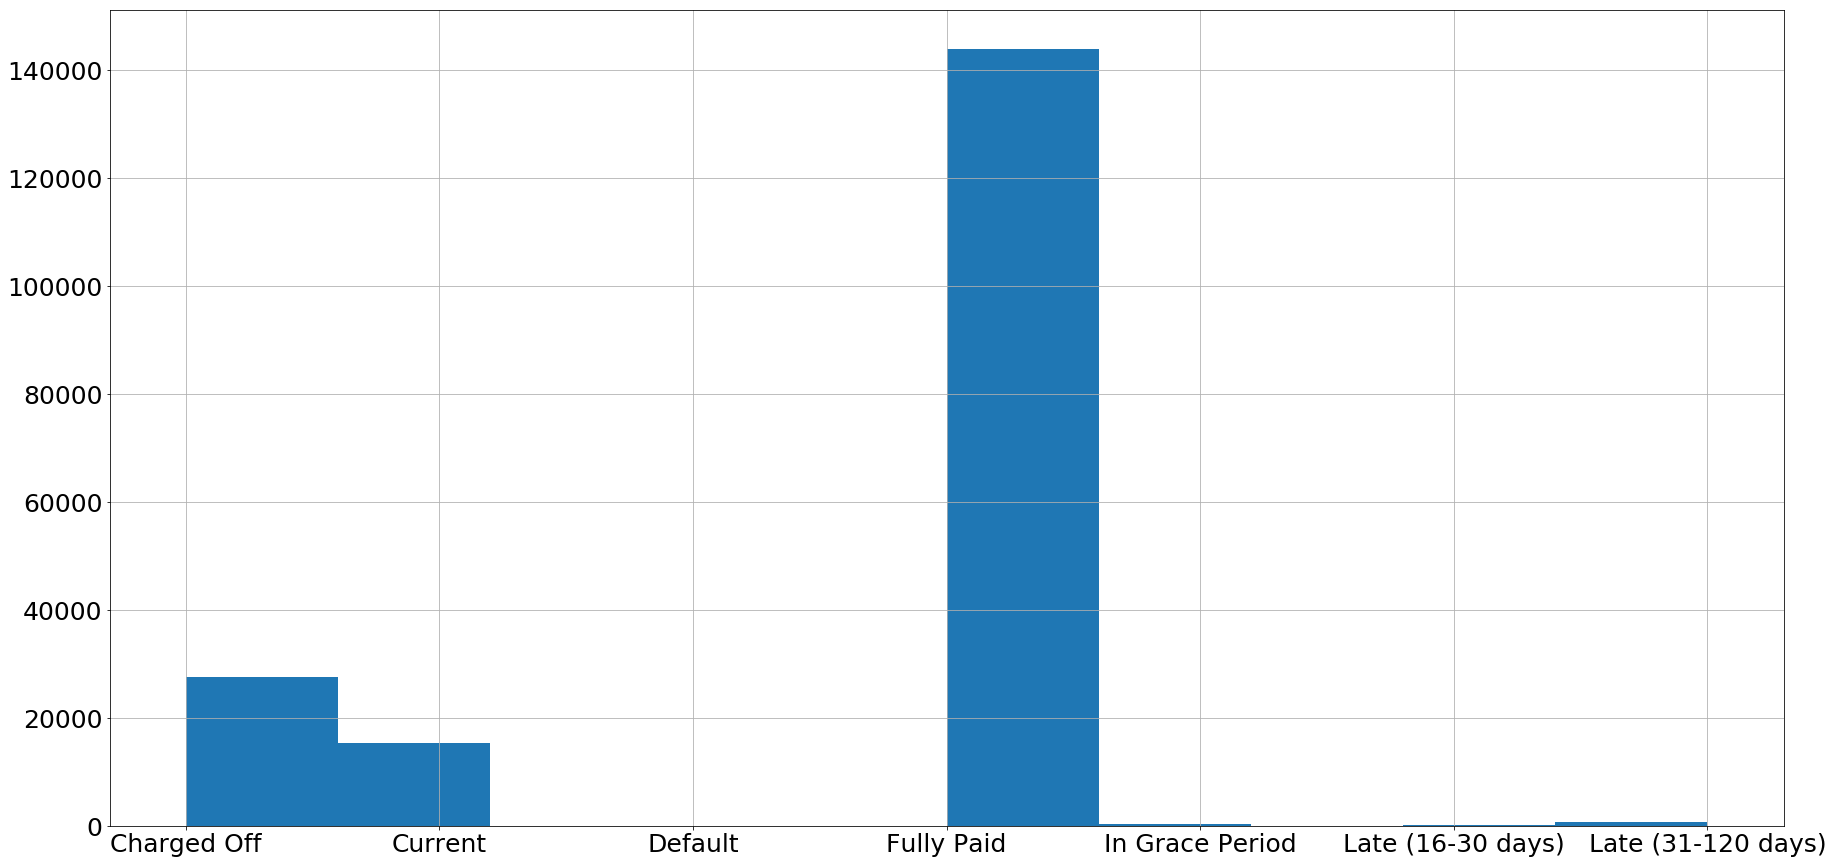

In [12]:
data['loan_status'].hist(figsize=(30,15),xlabelsize=25,ylabelsize=25)

In [13]:
#Function to inspect a column in the dataframe

def inspect_col(column, threshold, greaterThan=False, thousands=False):
    if greaterThan:
        temp_data = data[column].where(data[col] > threshold)
    else:
        temp_data = data[column].where(data[col] < threshold)
    if thousands:
        temp_data = temp_data / 1000
    temp_data.hist()
    plt.show()
    print('Within')
    print("="*30)
    print("mean:   {:15.2f}".format(temp_data.mean()))
    print("median: {:15.2f}".format(temp_data.median()))
    print("max:    {:15.2f}".format(temp_data.max()))
    print("\n")
    print('Total')
    print("="*30)
    if thousands:
        print("mean:   {:15.2f}".format(data[col].mean() / 1000))
        print("median: {:15.2f}".format(data[col].median()/ 1000))
        print("max:    {:15.2f}".format(data[col].max()/ 1000))
    else:
        print("mean:   {:15.2f}".format(data[col].mean()))
        print("median: {:15.2f}".format(data[col].median()))
        print("max:    {:15.2f}".format(data[col].max()))

In [14]:
#function encoding a column
def encode_col(column):
    label = LabelEncoder()
    data[col] = label.fit_transform(data[column].astype(str))
    print(column)
    print(data[col][:10])

loan_amnt                     


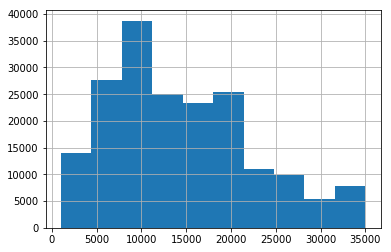

n:         188181.00 (100.00%)
mean:       14354.14
std:         8114.77 
funded_amnt                   


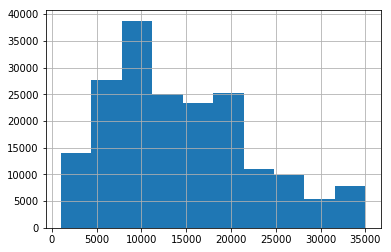

n:         188181.00 (100.00%)
mean:       14351.62
std:         8112.61 
funded_amnt_inv               


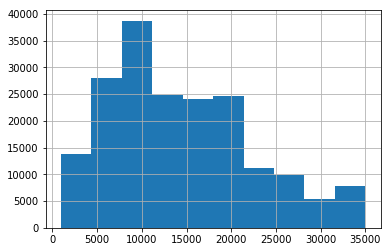

n:         188181.00 (100.00%)
mean:       14339.62
std:         8107.01 
installment                   


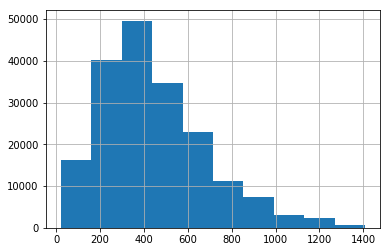

n:         188181.00 (100.00%)
mean:         443.74
std:          242.65 
annual_inc                    


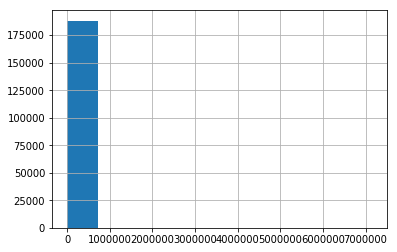

n:         188181.00 (100.00%)
mean:       72233.28
std:        51824.59 
dti                           


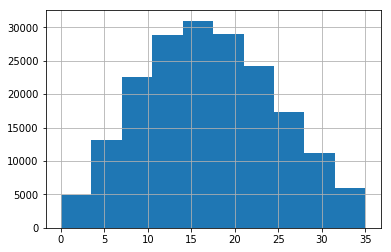

n:         188181.00 (100.00%)
mean:          17.06
std:            7.60 
delinq_2yrs                   


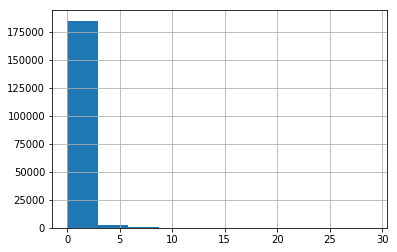

n:         188181.00 (100.00%)
mean:           0.24
std:            0.70 
fico_range_low                


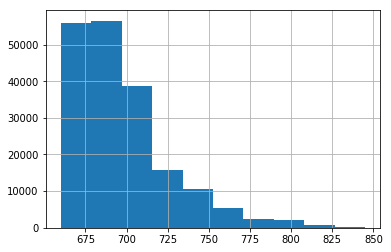

n:         188181.00 (100.00%)
mean:         696.81
std:           29.96 
fico_range_high               


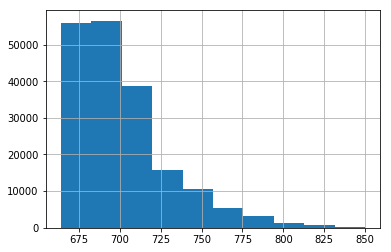

n:         188181.00 (100.00%)
mean:         700.81
std:           29.96 
inq_last_6mths                


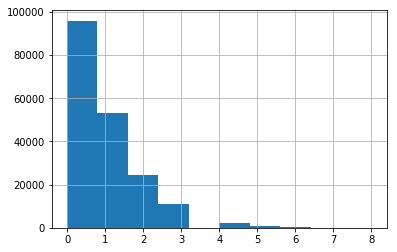

n:         188181.00 (100.00%)
mean:           0.80
std:            1.03 
mths_since_last_delinq        


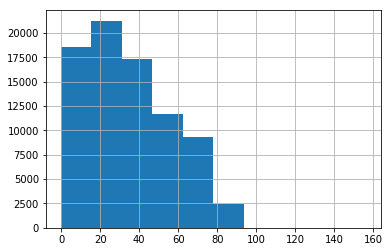

n:          80608.00 (42.83%)
mean:          34.98
std:           21.61 
mths_since_last_record        


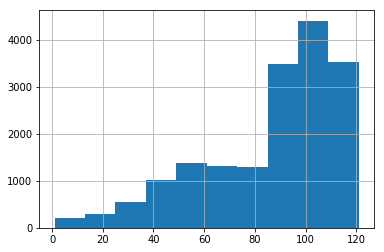

n:          17474.00 (9.29%)
mean:          86.01
std:           26.43 
open_acc                      


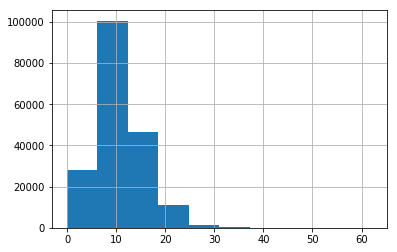

n:         188181.00 (100.00%)
mean:          11.00
std:            4.61 
pub_rec                       


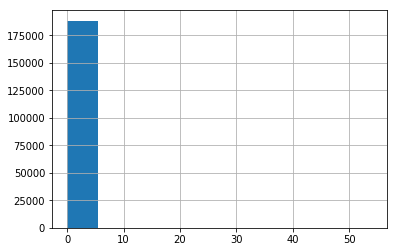

n:         188181.00 (100.00%)
mean:           0.11
std:            0.41 
revol_bal                     


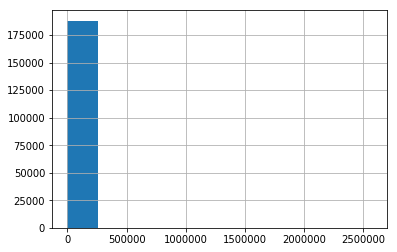

n:         188181.00 (100.00%)
mean:       16318.40
std:        19287.61 
total_acc                     


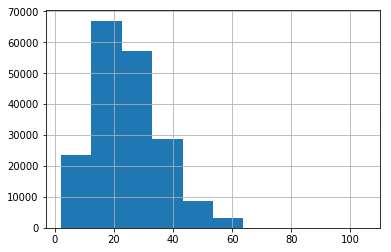

n:         188181.00 (100.00%)
mean:          24.54
std:           11.07 
out_prncp                     


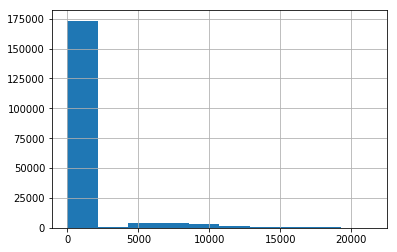

n:         188181.00 (100.00%)
mean:         673.94
std:         2475.84 
out_prncp_inv                 


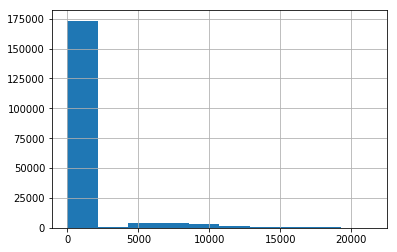

n:         188181.00 (100.00%)
mean:         673.56
std:         2474.70 
total_pymnt                   


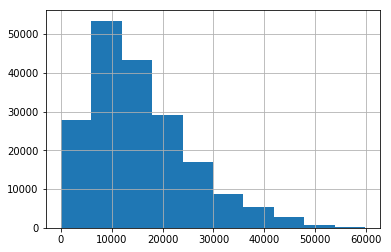

n:         188181.00 (100.00%)
mean:       15607.60
std:         9857.82 
total_pymnt_inv               


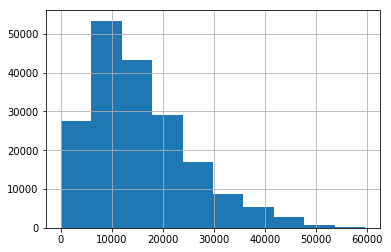

n:         188181.00 (100.00%)
mean:       15594.97
std:         9850.69 
total_rec_prncp               


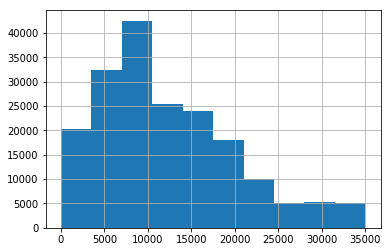

n:         188181.00 (100.00%)
mean:       12200.10
std:         7832.86 
total_rec_int                 


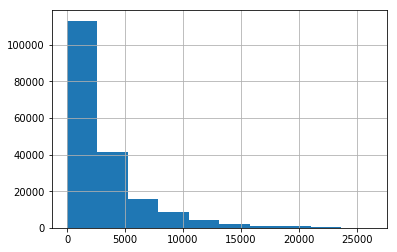

n:         188181.00 (100.00%)
mean:        3243.46
std:         3333.53 
total_rec_late_fee            


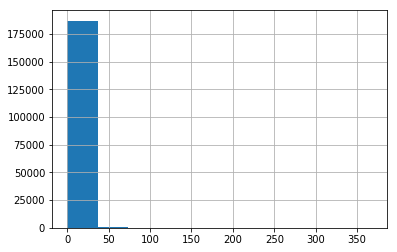

n:         188181.00 (100.00%)
mean:           0.88
std:            6.57 
recoveries                    


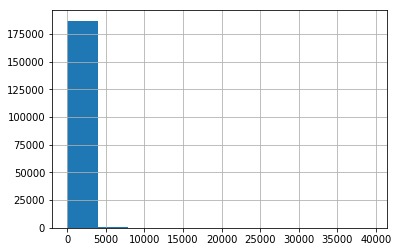

n:         188181.00 (100.00%)
mean:         163.16
std:          740.55 
collection_recovery_fee       


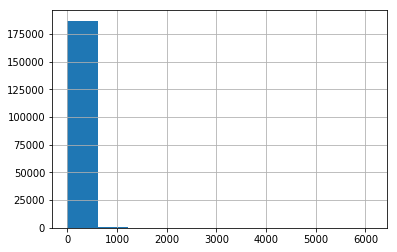

n:         188181.00 (100.00%)
mean:          17.04
std:          105.25 
last_pymnt_amnt               


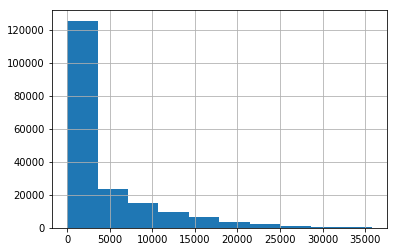

n:         188181.00 (100.00%)
mean:        4016.81
std:         5846.25 
last_fico_range_high          


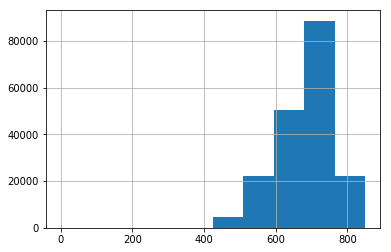

n:         188181.00 (100.00%)
mean:         683.73
std:           75.67 
last_fico_range_low           


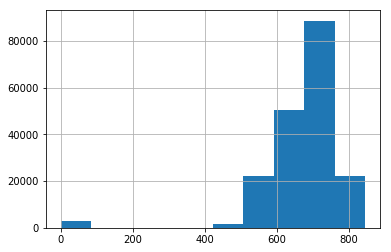

n:         188181.00 (100.00%)
mean:         671.98
std:          111.20 
collections_12_mths_ex_med    


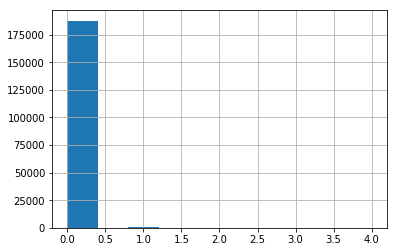

n:         188181.00 (100.00%)
mean:           0.00
std:            0.06 
mths_since_last_major_derog   


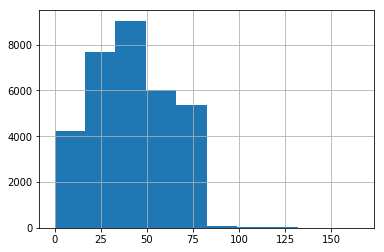

n:          32516.00 (17.28%)
mean:          41.80
std:           21.00 
policy_code                   


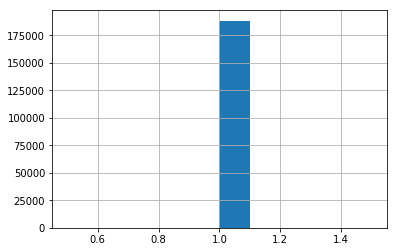

n:         188181.00 (100.00%)
mean:           1.00
std:            0.00 
annual_inc_joint              


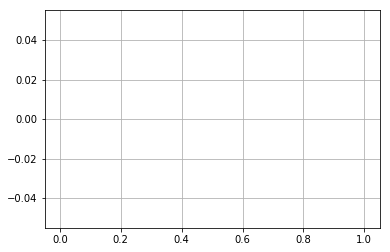

n:              0.00 (0.00%)
mean:            nan
std:             nan 
dti_joint                     


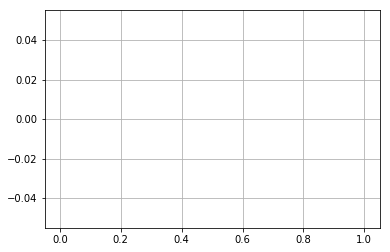

n:              0.00 (0.00%)
mean:            nan
std:             nan 
verification_status_joint     


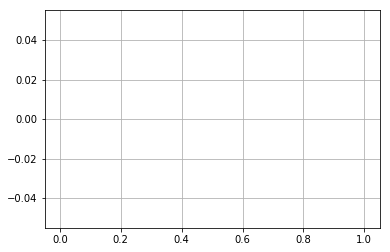

n:              0.00 (0.00%)
mean:            nan
std:             nan 
acc_now_delinq                


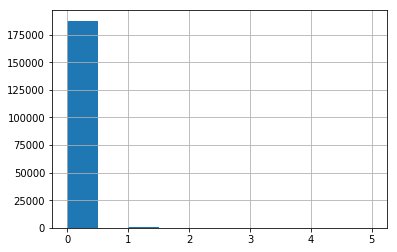

n:         188181.00 (100.00%)
mean:           0.00
std:            0.06 
tot_coll_amt                  


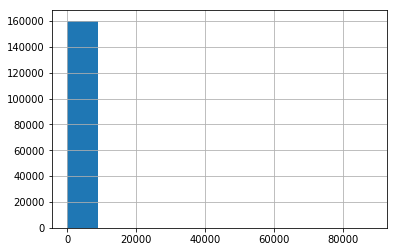

n:         160440.00 (85.26%)
mean:          76.74
std:          859.66 
tot_cur_bal                   


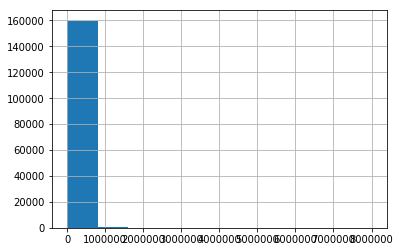

n:         160440.00 (85.26%)
mean:      137324.14
std:       150754.04 
open_acc_6m                   


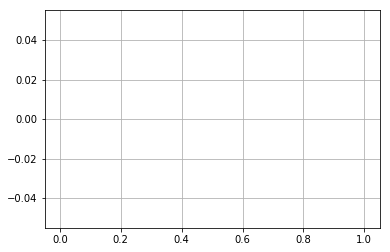

n:              0.00 (0.00%)
mean:            nan
std:             nan 
open_il_6m                    


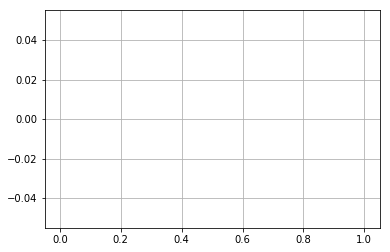

n:              0.00 (0.00%)
mean:            nan
std:             nan 
open_il_12m                   


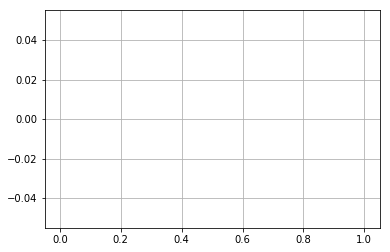

n:              0.00 (0.00%)
mean:            nan
std:             nan 
open_il_24m                   


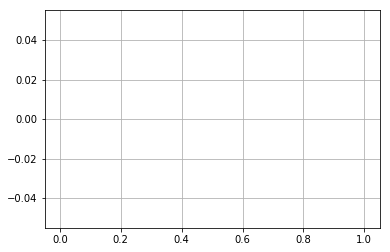

n:              0.00 (0.00%)
mean:            nan
std:             nan 
mths_since_rcnt_il            


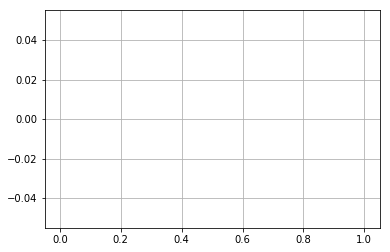

n:              0.00 (0.00%)
mean:            nan
std:             nan 
total_bal_il                  


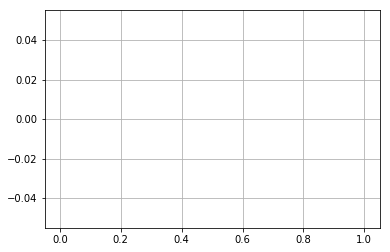

n:              0.00 (0.00%)
mean:            nan
std:             nan 
il_util                       


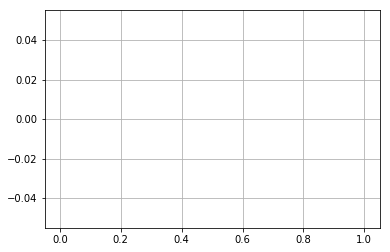

n:              0.00 (0.00%)
mean:            nan
std:             nan 
open_rv_12m                   


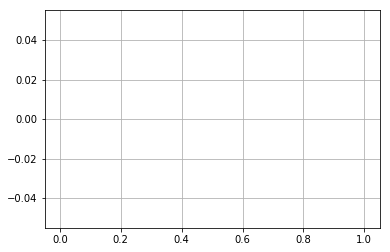

n:              0.00 (0.00%)
mean:            nan
std:             nan 
open_rv_24m                   


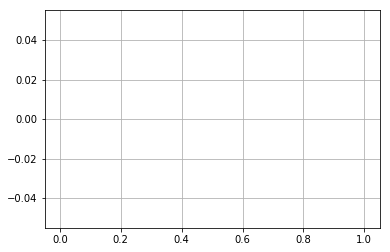

n:              0.00 (0.00%)
mean:            nan
std:             nan 
max_bal_bc                    


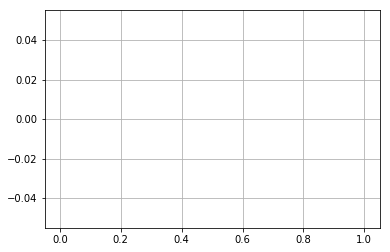

n:              0.00 (0.00%)
mean:            nan
std:             nan 
all_util                      


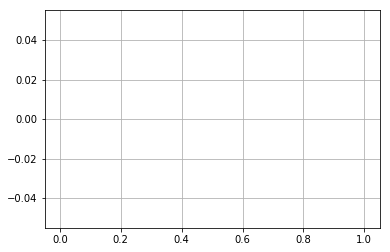

n:              0.00 (0.00%)
mean:            nan
std:             nan 
total_rev_hi_lim              


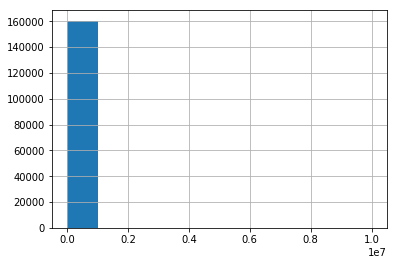

n:         160440.00 (85.26%)
mean:       29891.60
std:        37769.69 
inq_fi                        


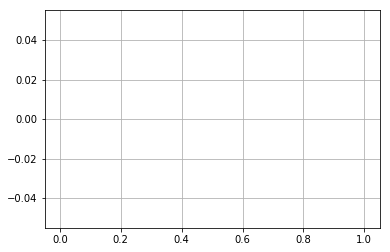

n:              0.00 (0.00%)
mean:            nan
std:             nan 
total_cu_tl                   


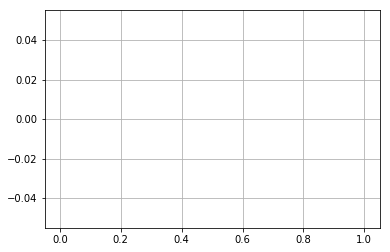

n:              0.00 (0.00%)
mean:            nan
std:             nan 
inq_last_12m                  


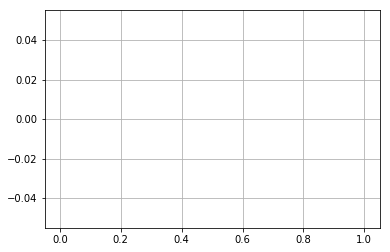

n:              0.00 (0.00%)
mean:            nan
std:             nan 
acc_open_past_24mths          


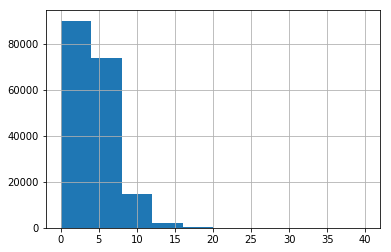

n:         180686.00 (96.02%)
mean:           3.93
std:            2.66 
avg_cur_bal                   


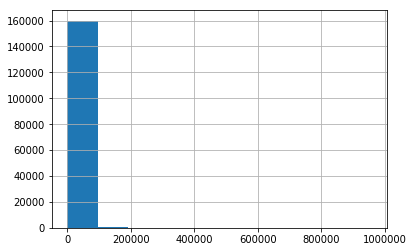

n:         160434.00 (85.25%)
mean:       13796.11
std:        16382.71 
bc_open_to_buy                


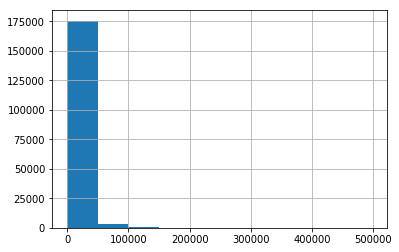

n:         179156.00 (95.20%)
mean:        8262.72
std:        13175.61 
bc_util                       


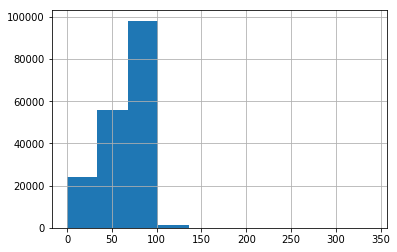

n:         179069.00 (95.16%)
mean:          66.83
std:           26.11 
chargeoff_within_12_mths      


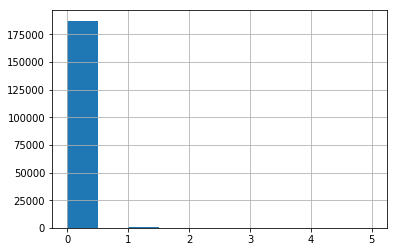

n:         188181.00 (100.00%)
mean:           0.01
std:            0.08 
delinq_amnt                   


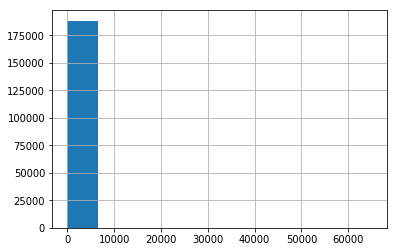

n:         188181.00 (100.00%)
mean:           8.37
std:          524.93 
mo_sin_old_il_acct            


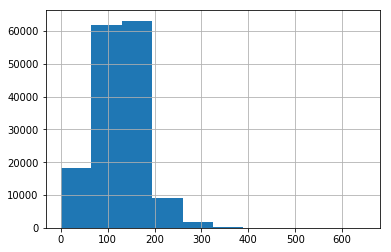

n:         154309.00 (82.00%)
mean:         125.08
std:           50.85 
mo_sin_old_rev_tl_op          


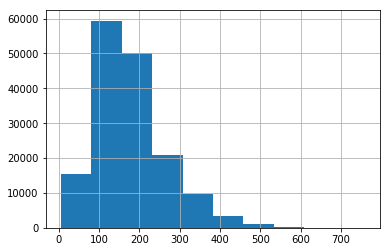

n:         160439.00 (85.26%)
mean:         178.49
std:           88.09 
mo_sin_rcnt_rev_tl_op         


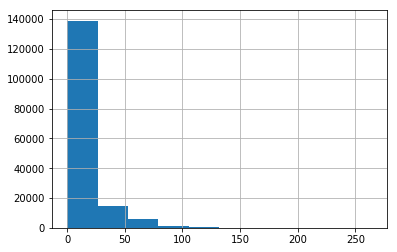

n:         160439.00 (85.26%)
mean:          14.11
std:           16.15 
mo_sin_rcnt_tl                


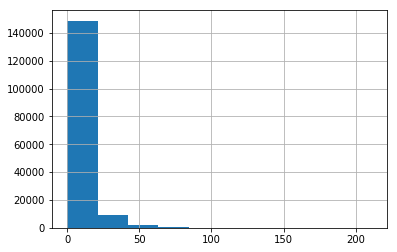

n:         160440.00 (85.26%)
mean:           8.94
std:            9.70 
mort_acc                      


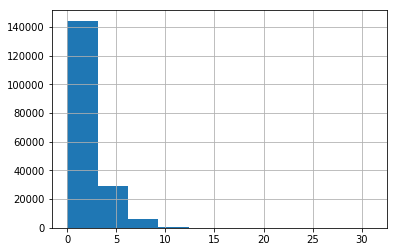

n:         180686.00 (96.02%)
mean:           1.81
std:            2.19 
mths_since_recent_bc          


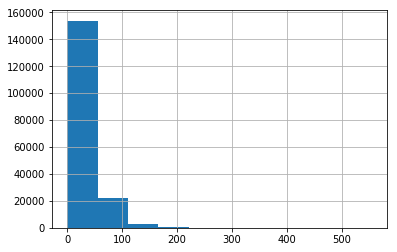

n:         179353.00 (95.31%)
mean:          25.66
std:           29.49 
mths_since_recent_bc_dlq      


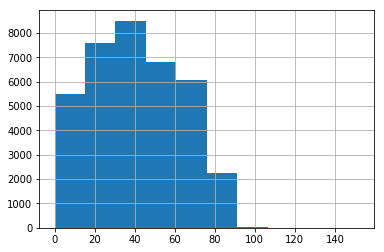

n:          36751.00 (19.53%)
mean:          40.82
std:           21.69 
mths_since_recent_inq         


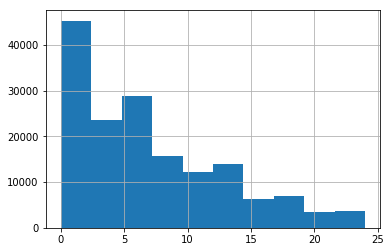

n:         160313.00 (85.19%)
mean:           6.99
std:            5.88 
mths_since_recent_revol_delinq


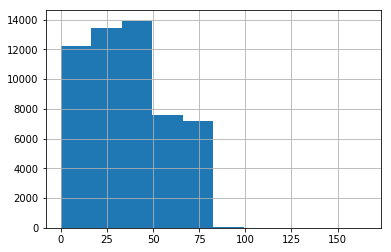

n:          54447.00 (28.93%)
mean:          36.61
std:           21.74 
num_accts_ever_120_pd         


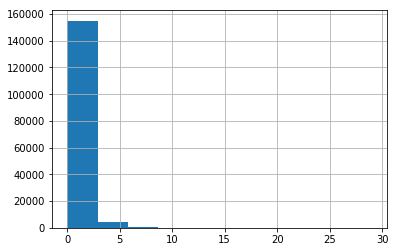

n:         160440.00 (85.26%)
mean:           0.33
std:            0.95 
num_actv_bc_tl                


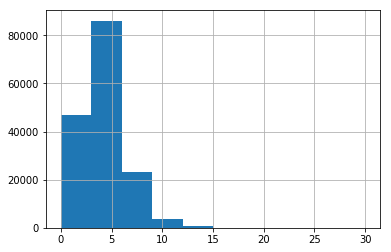

n:         160440.00 (85.26%)
mean:           3.76
std:            2.08 
num_actv_rev_tl               


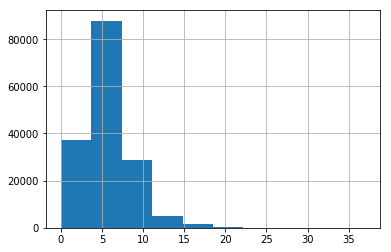

n:         160440.00 (85.26%)
mean:           5.68
std:            2.92 
num_bc_sats                   


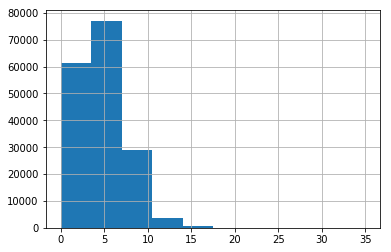

n:         172126.00 (91.47%)
mean:           4.67
std:            2.49 
num_bc_tl                     


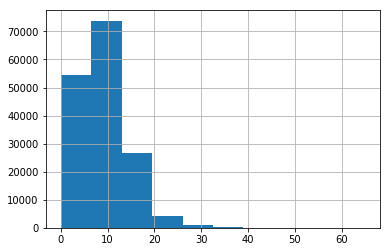

n:         160440.00 (85.26%)
mean:           9.02
std:            4.81 
num_il_tl                     


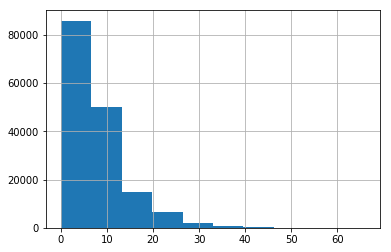

n:         160440.00 (85.26%)
mean:           7.73
std:            6.58 
num_op_rev_tl                 


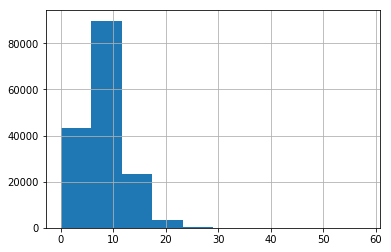

n:         160440.00 (85.26%)
mean:           8.09
std:            3.89 
num_rev_accts                 


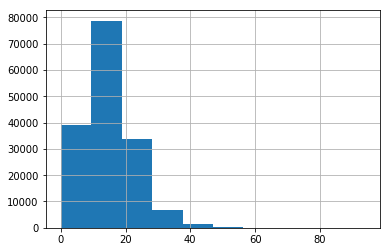

n:         160440.00 (85.26%)
mean:          14.95
std:            7.38 
num_rev_tl_bal_gt_0           


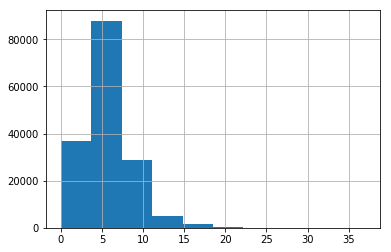

n:         160440.00 (85.26%)
mean:           5.69
std:            2.92 
num_sats                      


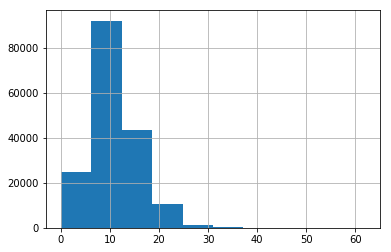

n:         172126.00 (91.47%)
mean:          11.09
std:            4.62 
num_tl_120dpd_2m              


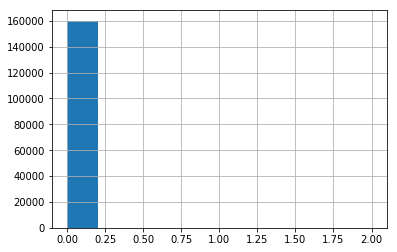

n:         160184.00 (85.12%)
mean:           0.00
std:            0.02 
num_tl_30dpd                  


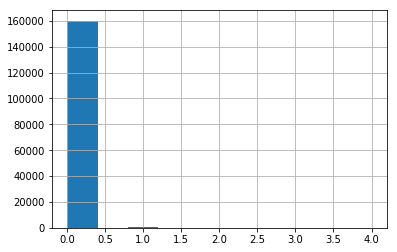

n:         160440.00 (85.26%)
mean:           0.00
std:            0.05 
num_tl_90g_dpd_24m            


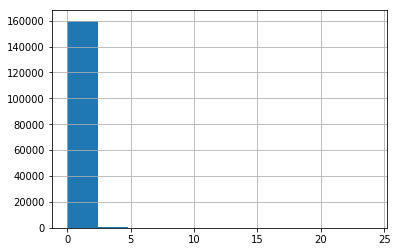

n:         160440.00 (85.26%)
mean:           0.06
std:            0.37 
num_tl_op_past_12m            


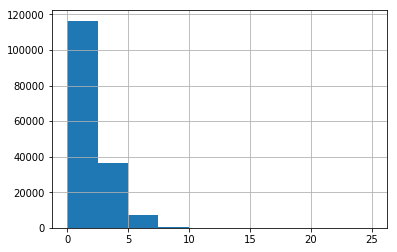

n:         160440.00 (85.26%)
mean:           1.79
std:            1.52 
pct_tl_nvr_dlq                


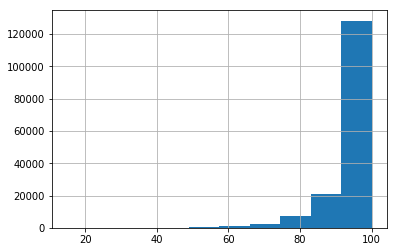

n:         160287.00 (85.18%)
mean:          95.40
std:            7.39 
percent_bc_gt_75              


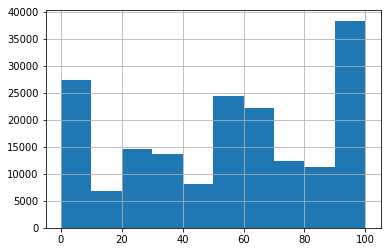

n:         179153.00 (95.20%)
mean:          53.56
std:           34.15 
pub_rec_bankruptcies          


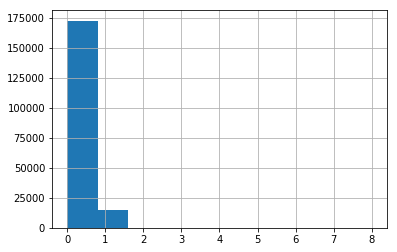

n:         188181.00 (100.00%)
mean:           0.08
std:            0.29 
tax_liens                     


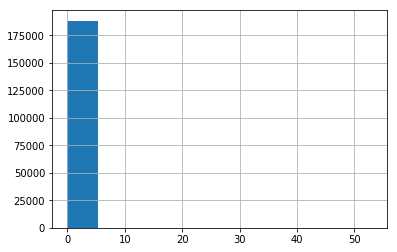

n:         188181.00 (100.00%)
mean:           0.01
std:            0.24 
tot_hi_cred_lim               


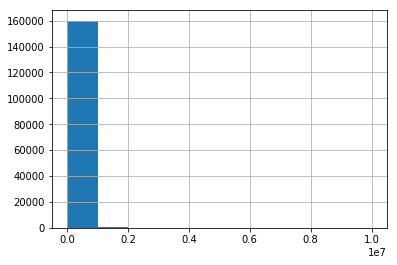

n:         160440.00 (85.26%)
mean:      165545.31
std:       167253.31 
total_bal_ex_mort             


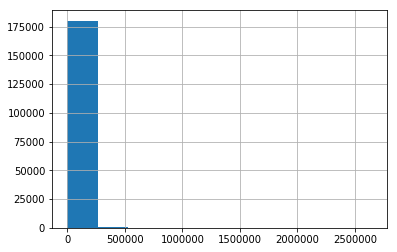

n:         180686.00 (96.02%)
mean:       42883.77
std:        40177.89 
total_bc_limit                


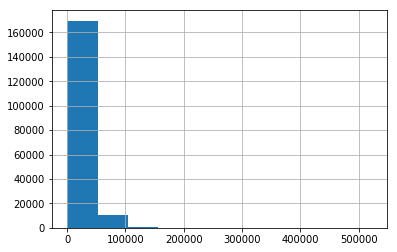

n:         180686.00 (96.02%)
mean:       20238.46
std:        18883.56 
total_il_high_credit_limit    


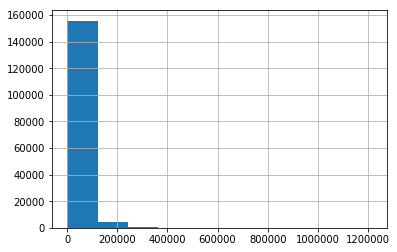

n:         160440.00 (85.26%)
mean:       34389.56
std:        36879.63 


In [15]:
#Function to remove a column
to_remove = ['member_id']
for rem in to_remove:
    if rem in floats:
        floats.remove(rem)
#Function to have the knowledge of stats of the column
for col in floats:
    print('='*52)
    print('{message: <30}'.format(message=col))
    data[col].hist()
    plt.show()
    print('n:    {:14.2f}'.format(len(data[col].dropna())), "({:.2f}%)".format(100*len(data[col].dropna())/len(data[col])))
    print('mean: {:14.2f}'.format(data[col].mean()))
    print('std:  {:14.2f} '.format(data[col].std()))
    

In [16]:
#Deleting the unwanted columns

to_remove = [
    'id', 'desc', 'url','title','emp_title','annual_inc_joint','dti_joint','verification_status_joint',
    'open_acc_6m', 'open_il_6m', 'open_il_12m',  'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 
    'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
    'application_type', 'pymnt_plan'
]

for rem in to_remove:
    if rem in data.columns:
        data.drop(rem,axis=1,inplace=True)
    if rem in objects:
        objects.remove(rem)
for col in objects:
    print(data[col].value_counts())
    print("\n")

 36 months    143892
 60 months     44289
Name: term, dtype: int64


12.12%    9409
13.11%    8257
8.90%     7640
14.33%    7142
7.90%     6612
11.14%    6428
15.31%    5345
16.29%    5030
7.62%     4718
15.80%    4614
17.27%    4454
10.16%    4318
6.03%     4253
14.09%    4247
6.62%     3805
17.77%    3482
11.99%    3384
10.99%    3185
13.67%    2818
18.49%    2777
15.61%    2771
12.99%    2759
12.35%    2546
11.55%    2459
19.05%    2362
10.64%    2314
18.75%    2280
14.30%    2131
16.20%    2088
9.71%     2084
          ... 
22.45%     110
15.27%     107
15.96%     104
17.58%      97
22.78%      84
23.13%      73
18.64%      71
25.99%      63
19.91%      53
19.03%      53
26.06%      52
23.33%      47
19.42%      47
20.30%      46
23.26%      46
6.00%       41
24.20%      35
21.28%      31
20.89%      31
24.33%      21
21.67%      19
22.74%      12
22.06%      11
22.35%      11
24.52%       6
24.76%       6
24.11%       5
23.91%       3
23.52%       2
14.28%       1
Name: int_rate, 

In [17]:
# create target varaibale column in deciding Default or not
data['target'] = data['loan_status'].apply(lambda x: x ==('Fully Paid' or 'Current'))*1
data = data.drop(['loan_status'],axis=1)

In [18]:
#Data cleaning 
data['int_rate'] = data['int_rate'].fillna("0%").astype(str).apply(lambda x:float(x[:-1]))
data['revol_util'] = data['revol_util'].fillna("0%").astype(str).apply(lambda x:float(x[:-1]))

In [19]:
#encoding the required columns
encode_col('grade')
encode_col('sub_grade')
encode_col('term')
encode_col('emp_length')
encode_col('home_ownership')
encode_col('verification_status')
encode_col('purpose')
encode_col('zip_code')
encode_col('addr_state')
encode_col('initial_list_status')
encode_col('issue_d')
encode_col('earliest_cr_line')
encode_col('last_pymnt_d')
encode_col('next_pymnt_d')
encode_col('last_credit_pull_d')

grade
0    1
1    0
2    1
3    1
4    1
5    4
6    0
7    1
8    1
9    1
Name: last_credit_pull_d, dtype: int64
sub_grade
0     9
1     1
2     6
3     9
4     9
5    23
6     2
7     7
8     5
9     8
Name: last_credit_pull_d, dtype: int64
term
0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: last_credit_pull_d, dtype: int64
emp_length
0    1
1    1
2    4
3    1
4    1
5    4
6    5
7    1
8    7
9    1
Name: last_credit_pull_d, dtype: int64
home_ownership
0    4
1    0
2    4
3    4
4    0
5    4
6    0
7    0
8    0
9    4
Name: last_credit_pull_d, dtype: int64
verification_status
0    2
1    0
2    0
3    1
4    2
5    2
6    1
7    1
8    0
9    2
Name: last_credit_pull_d, dtype: int64
purpose
0    2
1    2
2    2
3    2
4    1
5    2
6    2
7    2
8    2
9    2
Name: last_credit_pull_d, dtype: int64
zip_code
0     74
1     40
2    248
3    728
4    444
5    781
6    788
7    685
8     17
9    288
Name: last_credit_pull_d, dtype: int64
addr_state
0  

In [20]:
for col in data.columns:
    data[col]=data[col].replace([np.inf, -np.inf], np.nan,inplace=True)
    data[col]=data[col].fillna(data[col].mean(),inplace=True)

In [21]:
#Saving the clean DataSet
data.to_csv('cleaned_dataset.csv',encoding='utf-8')